# Project – Baseball Player Salary

## Import Libraries

In [1]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error      
from sklearn.preprocessing import StandardScaler

## Load the Data

In [2]:
 playerdf = pd.read_csv(r'C:\Users\ftt\Downloads/Hitters.csv', index_col=0) 

In [3]:
playerdf

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A


In [4]:
 playerdf.head() 

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Dimension of the Data

In [5]:
playerdf.shape 

(322, 19)

## Data Type

In [6]:
playerdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 293 to 631
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hits       322 non-null    int64  
 1   HmRun      322 non-null    int64  
 2   Runs       322 non-null    int64  
 3   RBI        322 non-null    int64  
 4   Walks      322 non-null    int64  
 5   Years      322 non-null    int64  
 6   CAtBat     322 non-null    int64  
 7   CHits      322 non-null    int64  
 8   CHmRun     322 non-null    int64  
 9   CRuns      322 non-null    int64  
 10  CRBI       322 non-null    int64  
 11  CWalks     322 non-null    int64  
 12  League     322 non-null    object 
 13  Division   322 non-null    object 
 14  PutOuts    322 non-null    int64  
 15  Assists    322 non-null    int64  
 16  Errors     322 non-null    int64  
 17  Salary     263 non-null    float64
 18  NewLeague  322 non-null    object 
dtypes: float64(1), int64(15), object(3)
memory usage: 50.

## Null Values

In [7]:
playerdf.isnull().sum()

Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

## Drop Null Values

In [8]:
playerdf.dropna(inplace=True)

In [9]:
 playerdf.shape 

(263, 19)

## Statistical Analysis

In [10]:
pd.set_option('display.precision', 2)

In [11]:
 playerdf.describe()

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00,263.00
mean,107.83,11.62,54.75,51.49,41.11,7.31,2657.54,722.19,69.24,361.22,330.42,260.27,290.71,118.76,8.59,535.93
std,45.13,8.76,25.54,25.88,21.72,4.79,2286.58,648.20,82.20,331.20,323.37,264.06,279.93,145.08,6.61,451.12
min,1.00,0.00,0.00,0.00,0.00,1.00,19.00,4.00,0.00,2.00,3.00,1.00,0.00,0.00,0.00,67.50
25%,71.50,5.00,33.50,30.00,23.00,4.00,842.50,212.00,15.00,105.50,95.00,71.00,113.50,8.00,3.00,190.00
50%,103.00,9.00,52.00,47.00,37.00,6.00,1931.00,516.00,40.00,250.00,230.00,174.00,224.00,45.00,7.00,425.00
75%,141.50,18.00,73.00,71.00,57.00,10.00,3890.50,1054.00,92.50,497.50,424.50,328.50,322.50,192.00,13.00,750.00
max,238.00,40.00,130.00,121.00,105.00,24.00,14053.00,4256.00,548.00,2165.00,1659.00,1566.00,1377.00,492.00,32.00,2460.00


## Categorical Variable Analysis

In [12]:
 playerdf.League.value_counts()

League
A    139
N    124
Name: count, dtype: int64

In [13]:
 playerdf.Division.value_counts()

Division
W    134
E    129
Name: count, dtype: int64

In [14]:
playerdf.NewLeague.value_counts()

NewLeague
A    141
N    122
Name: count, dtype: int64

## Encode Categorical Variables

In [15]:
 dummyCol = pd.get_dummies(playerdf[['League', 'Division', 'NewLeague']])

In [16]:
 dummyCol.head(3)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
AtBat,,,,,,
315,False,True,False,True,False,True
479,True,False,False,True,True,False
496,False,True,True,False,False,True


In [17]:
dummyCol.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 315 to 631
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_A     263 non-null    bool 
 1   League_N     263 non-null    bool 
 2   Division_E   263 non-null    bool 
 3   Division_W   263 non-null    bool 
 4   NewLeague_A  263 non-null    bool 
 5   NewLeague_N  263 non-null    bool 
dtypes: bool(6)
memory usage: 3.6 KB


# Prepare Input and Output Variables


## Prepare Input Variables (X)

In [18]:
XTemp = playerdf.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)

In [22]:
 X = pd.concat([XTemp, dummyCol[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [23]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 315 to 631
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Hits         263 non-null    int64
 1   HmRun        263 non-null    int64
 2   Runs         263 non-null    int64
 3   RBI          263 non-null    int64
 4   Walks        263 non-null    int64
 5   Years        263 non-null    int64
 6   CAtBat       263 non-null    int64
 7   CHits        263 non-null    int64
 8   CHmRun       263 non-null    int64
 9   CRuns        263 non-null    int64
 10  CRBI         263 non-null    int64
 11  CWalks       263 non-null    int64
 12  PutOuts      263 non-null    int64
 13  Assists      263 non-null    int64
 14  Errors       263 non-null    int64
 15  League_N     263 non-null    bool 
 16  Division_W   263 non-null    bool 
 17  NewLeague_N  263 non-null    bool 
dtypes: bool(3), int64(15)
memory usage: 33.6 KB


## Prepare Output Variables (Y)

In [24]:
y = playerdf.Salary

In [25]:
y.head()

AtBat
315    475.0
479    480.0
496    500.0
321     91.5
594    750.0
Name: Salary, dtype: float64

# Ridge Regression

In [26]:
alphas = 10**np.linspace(10,-2,100)*0.00001

In [27]:
 ridge = Ridge() 

In [28]:
coeffs = []

In [32]:
scaler = StandardScaler() 
for a in alphas: 
    ridge.set_params(alpha=a) 
    ridge.fit(scaler.fit_transform(X), y) 
    coeffs.append(ridge.coef_)


In [33]:
np.shape(coeffs)

(100, 18)

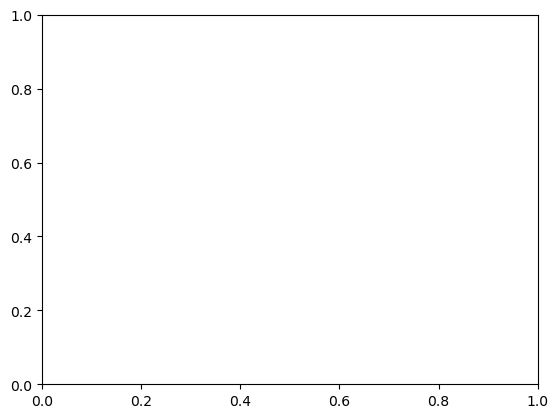

In [34]:
ax = plt.gca()

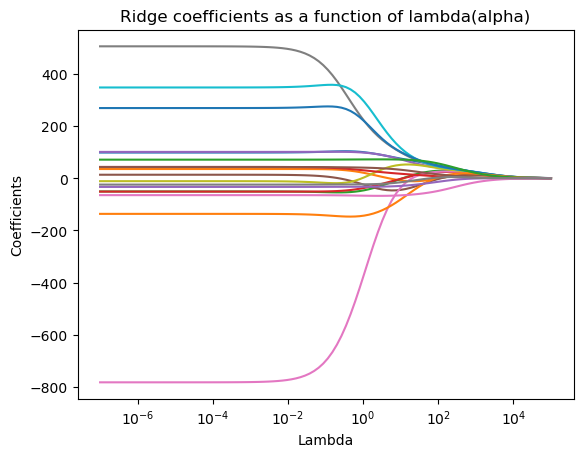

In [38]:
ax = plt.gca()
ax.plot(alphas, coeffs) 
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('Lambda') 
plt.ylabel('Coefficients') 
plt.title('Ridge coefficients as a function of lambda(alpha)')
plt.show() 

In [42]:
pd.set_option('display.precision', 6)  

In [43]:
 X_train, X_test , y_train, y_test = model_selection.train_test_split(X,y, test_size=0.5, random_state=1)              

In [66]:
 def Ridge_Regression(alpha): 
     scaler = StandardScaler() 
ridge = Ridge(alpha=a) 
ridge.fit(scaler.fit_transform(X_train), y_train) 
pred = ridge.predict(scaler.fit_transform(X_test)) 
print(pd.Series(ridge.coef_, index=X.columns)) 
print('Mean Squared Error: ',mean_squared_error(y_test, pred))

Hits            -49.150111
HmRun           -44.967769
Runs             28.118853
RBI              90.820350
Walks            41.769596
Years            73.037467
CAtBat        -1945.351003
CHits          2169.566693
CHmRun          359.134234
CRuns          -124.236721
CRBI           -407.061158
CWalks          152.415392
PutOuts         118.977393
Assists          51.254265
Errors          -49.595691
League_N         66.508333
Division_W      -63.937555
NewLeague_N     -36.138606
dtype: float64
Mean Squared Error:  131574.52734197237


## Ridge Regression (Lambda = 0)

In [70]:
Ridge_Regression(0)

## Ridge Regression (Lambda = 4)

In [71]:
 Ridge_Regression(4)

## Ridge Regression (Lambda = 100)

In [72]:
Ridge_Regression(100)

## Ridge Regression (Lambda = 10**10

In [76]:
Ridge_Regression(10**10)

## RidgeCV– cv=none

In [77]:
scaler = StandardScaler()

In [78]:
ridgecv = RidgeCV(alphas=alphas)

In [79]:
ridgecv.fit(scaler.fit_transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+05, 7.56463328e+04, 5.72236766e+04, 4.32876128e+04,
       3.27454916e+04, 2.47707636e+04, 1.87381742e+04, 1.41747416e+04,
       1.07226722e+04, 8.11130831e+03, 6.13590727e+03, 4.64158883e+03,
       3.51119173e+03, 2.65608778e+03, 2.00923300e+03, 1.51991108e+03,
       1.14975700e+03, 8.69749003e+02, 6.57933225e+02, 4.97702356e+02,
       3.76493581e+02, 2.84803587e+0...
       6.13590727e-05, 4.64158883e-05, 3.51119173e-05, 2.65608778e-05,
       2.00923300e-05, 1.51991108e-05, 1.14975700e-05, 8.69749003e-06,
       6.57933225e-06, 4.97702356e-06, 3.76493581e-06, 2.84803587e-06,
       2.15443469e-06, 1.62975083e-06, 1.23284674e-06, 9.32603347e-07,
       7.05480231e-07, 5.33669923e-07, 4.03701726e-07, 3.05385551e-07,
       2.31012970e-07, 1.74752840e-07, 1.32194115e-07, 1.00000000e-07]))

In [80]:
ridgecv.alpha_ 

93.26033468832199

## RidgeCV – cv=5

In [81]:
 scaler = StandardScaler()

In [82]:
ridgecv = RidgeCV(alphas=alphas, cv=5)

In [83]:
 ridgecv.fit(scaler.fit_transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+05, 7.56463328e+04, 5.72236766e+04, 4.32876128e+04,
       3.27454916e+04, 2.47707636e+04, 1.87381742e+04, 1.41747416e+04,
       1.07226722e+04, 8.11130831e+03, 6.13590727e+03, 4.64158883e+03,
       3.51119173e+03, 2.65608778e+03, 2.00923300e+03, 1.51991108e+03,
       1.14975700e+03, 8.69749003e+02, 6.57933225e+02, 4.97702356e+02,
       3.76493581e+02, 2.84803587e+0...
       6.13590727e-05, 4.64158883e-05, 3.51119173e-05, 2.65608778e-05,
       2.00923300e-05, 1.51991108e-05, 1.14975700e-05, 8.69749003e-06,
       6.57933225e-06, 4.97702356e-06, 3.76493581e-06, 2.84803587e-06,
       2.15443469e-06, 1.62975083e-06, 1.23284674e-06, 9.32603347e-07,
       7.05480231e-07, 5.33669923e-07, 4.03701726e-07, 3.05385551e-07,
       2.31012970e-07, 1.74752840e-07, 1.32194115e-07, 1.00000000e-07]),
        cv=5)

In [84]:
 ridgecv.alpha_ 

93.26033468832199

## RidgeCV – cv=10

In [85]:
 scaler = StandardScaler()

In [86]:
 ridgecv = RidgeCV(alphas=alphas, cv=10)

In [87]:
 ridgecv.fit(scaler.fit_transform(X_train), y_train)

RidgeCV(alphas=array([1.00000000e+05, 7.56463328e+04, 5.72236766e+04, 4.32876128e+04,
       3.27454916e+04, 2.47707636e+04, 1.87381742e+04, 1.41747416e+04,
       1.07226722e+04, 8.11130831e+03, 6.13590727e+03, 4.64158883e+03,
       3.51119173e+03, 2.65608778e+03, 2.00923300e+03, 1.51991108e+03,
       1.14975700e+03, 8.69749003e+02, 6.57933225e+02, 4.97702356e+02,
       3.76493581e+02, 2.84803587e+0...
       6.13590727e-05, 4.64158883e-05, 3.51119173e-05, 2.65608778e-05,
       2.00923300e-05, 1.51991108e-05, 1.14975700e-05, 8.69749003e-06,
       6.57933225e-06, 4.97702356e-06, 3.76493581e-06, 2.84803587e-06,
       2.15443469e-06, 1.62975083e-06, 1.23284674e-06, 9.32603347e-07,
       7.05480231e-07, 5.33669923e-07, 4.03701726e-07, 3.05385551e-07,
       2.31012970e-07, 1.74752840e-07, 1.32194115e-07, 1.00000000e-07]),
        cv=10)

In [88]:
ridgecv.alpha_ 

162.97508346206436

## Optimal Ridge Regression

In [89]:
scaler = StandardScaler()

In [90]:
 opt_ridge = Ridge(alpha=ridgecv.alpha_)

In [91]:
 opt_ridge.fit(scaler.fit_transform(X_train), y_train)

Ridge(alpha=162.97508346206436)

In [92]:
 pred = opt_ridge.predict(scaler.fit_transform(X_test))

In [93]:
mean_squared_error(y_test, pred)

99819.503202809

## Ridge Regression -  Full Dataset

In [94]:
 opt_ridge.fit(X, y)

Ridge(alpha=162.97508346206436)

In [95]:
 pd.Series(opt_ridge.coef_, index=X.columns)

Hits            1.926430
HmRun           2.195690
Runs           -1.635374
RBI            -1.188258
Walks           4.335115
Years           3.610210
CAtBat         -0.358895
CHits           0.763328
CHmRun         -0.205202
CRuns           1.161654
CRBI            0.846042
CWalks         -0.470202
PutOuts         0.261951
Assists         0.298706
Errors         -4.624425
League_N       11.776482
Division_W    -36.026199
NewLeague_N     4.886124
dtype: float64

# Lasso Regression

In [96]:
 lasso = Lasso(max_iter=100000)

In [97]:
 coefs = []

In [98]:
 scaler = StandardScaler()

In [102]:
 for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(scaler.fit_transform(X_train), y_train) 
    coefs.append(lasso.coef_)


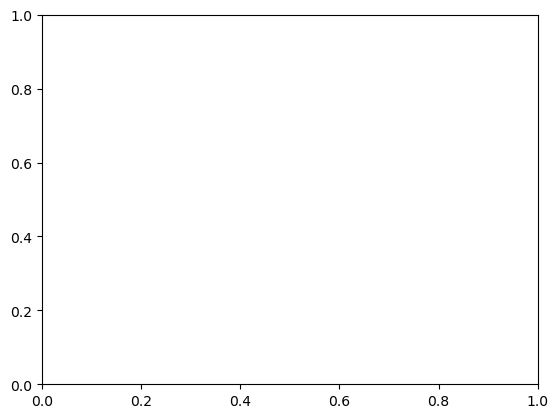

In [103]:
ax = plt.gca()

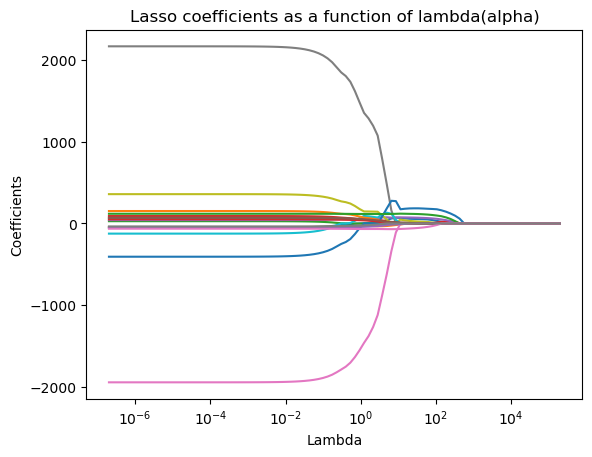

In [108]:
ax = plt.gca()
ax.plot(alphas*2, coefs) 
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('Lambda') 
plt.ylabel('Coefficients') 
plt.title('Lasso coefficients as a function of lambda(alpha)'); 
plt.show()


## LassoCV – cv =10

In [109]:
 lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)

In [110]:
 lassocv.fit(scaler.fit_transform(X_train), y_train)

LassoCV(cv=10, max_iter=100000)

In [111]:
 lassocv.alpha_

27.50328326187841

## Optimal Lasso

In [112]:
 lasso.set_params(alpha=lassocv.alpha_)

Lasso(alpha=27.50328326187841, max_iter=100000)

In [113]:
 lasso.fit(scaler.fit_transform(X_train), y_train)

Lasso(alpha=27.50328326187841, max_iter=100000)

In [114]:
 mean_squared_error(y_test, lasso.predict(scaler.fit_transform(X_test)))

106183.67168489807

In [115]:
 pd.Series(lasso.coef_, index=X.columns)

Hits            50.246042
HmRun            0.000000
Runs             0.000000
RBI              0.000000
Walks           66.794635
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun          19.439743
CRuns            0.000000
CRBI           181.337857
CWalks           0.000000
PutOuts        110.307285
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W     -44.530905
NewLeague_N      0.000000
dtype: float64

## Coefficients != 0

In [116]:
 pd.Series(lasso.coef_[lasso.coef_ !=0], index=X.columns[lasso.coef_ !=0])

Hits           50.246042
Walks          66.794635
CHmRun         19.439743
CRBI          181.337857
PutOuts       110.307285
Division_W    -44.530905
dtype: float64

# Principal Component Analysis


## Import Libraries

In [117]:
from sklearn.preprocessing import scale

In [118]:
 from sklearn.decomposition import PCA

In [119]:
 from sklearn.model_selection import KFold, cross_val_score

In [120]:
 from sklearn.linear_model import LinearRegression

In [121]:
 from sklearn.metrics import mean_squared_error

## Principal Components

In [122]:
 pca = PCA()

In [123]:
X_pca_reduced = pca.fit_transform(scale(X))

In [124]:
 print(pca.components_.shape)

(18, 18)


In [125]:
pd.DataFrame(pca.components_.T).loc[:4,:4]

,0,1,2,3,4
0,0.161710,-0.423509,0.109637,0.028159,-0.002138
1,0.188275,-0.311492,-0.179181,-0.228319,0.085590
2,0.165986,-0.436438,0.022885,-0.039497,-0.034708
3,0.210373,-0.384999,-0.032467,-0.128594,0.031579
4,0.191272,-0.285859,0.079043,-0.120264,-0.026362


## Principal Components Variance Explained

In [126]:
 np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 39.15,  58.68,  69.84,  78.48,  84.02,  88.58,  92.37,  94.97,
        96.36,  97.36,  98.12,  98.82,  99.35,  99.68,  99.89,  99.97,
       100.  , 100.01])

## PCA Training Data

In [127]:
 pca_t = PCA() 

In [128]:
X_train_reduced_pca = pca_t.fit_transform(scale(X_train))

In [129]:
 n = len(X_train_reduced_pca) 

In [130]:
kfold10 = KFold(n_splits=10)

In [131]:
 lm_regr = LinearRegression()

In [132]:
 mse = [] 

In [133]:
 tr_score = -1*cross_val_score(lm_regr, np.ones((n,1)),y_train, cv=kfold10, 
scoring='neg_mean_squared_error').mean()

In [134]:
 mse.append(tr_score)

In [136]:
 for i in np.arange(1, 20): 
    tr_score = -1*cross_val_score(lm_regr, X_train_reduced_pca[:,:i], y_train, cv=kfold10, scoring='neg_mean_squared_error').mean() 
    mse.append(tr_score)

## Plot MSE vs No of Principal Components

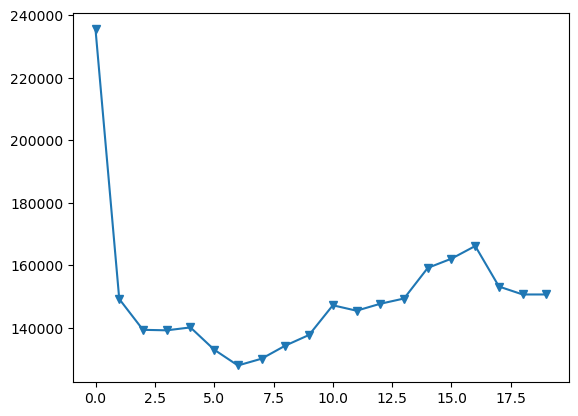

In [137]:
plt.plot(mse, '-v')

[]

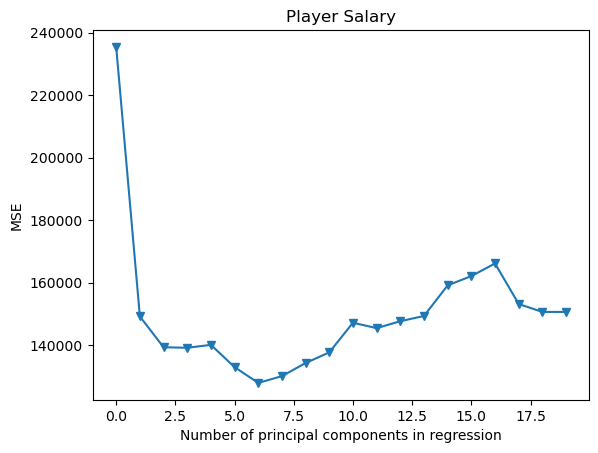

In [140]:
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression') 
plt.ylabel('MSE') 
plt.title('Player Salary') 
plt.xlim(xmin=-1); 
plt.plot()


## MSE for each component

In [141]:
 mse_each_comp=pd.Series(np.array(mse).flatten(), index = np.arange(1,21))

In [142]:
 mse_each_comp

1     235406.619100
2     149161.629821
3     139296.902000
4     139137.587034
5     140064.826261
6     132945.585602
7     127888.187692
8     130061.232677
9     134254.365221
10    137665.179526
11    147152.378939
12    145415.193008
13    147634.748709
14    149316.329876
15    159112.658871
16    162072.100734
17    166116.846076
18    153148.057538
19    150609.164991
20    150609.164991
dtype: float64

## Minimum MSE

In [143]:
np.amin(mse_each_comp)

127888.1876923691

## Regression Model with Reduced Component

In [144]:
 X_test_reduced_pca = pca_t.transform(scale(X_test))[:,:7]

In [145]:
 regr = LinearRegression()

In [146]:
regr.fit(X_train_reduced_pca[:,:7], y_train)

LinearRegression()

In [147]:
pred = regr.predict(X_test_reduced_pca)

In [148]:
 mean_squared_error(y_test, pred)

111367.9363734163

In [150]:
regr.coef_

array([111.01846813, -55.50200376,  34.11526267, -22.80894684,
       -86.3056142 ,  95.38234231, -48.58170014])